# Weight and bias initialisers 

In this reading we investigate different ways to initialise weights and biases in the layers of neural networks.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import tensorflow as tf
import pandas as pd
print(tf.__version__)

2.8.2


### Default weights and biases

In the models we have worked with so far, we have not specified the initial values of the weights and biases in each layer of our neural networks.

The default values of the weights and biases in TensorFlow depend on the type of layers we are using. 

For example, in a `Dense` layer, the biases are set to zero (`zeros`) by default, while the weights are set according to `glorot_uniform`, the Glorot uniform initialiser. 

The Glorot uniform initialiser draws the weights uniformly at random from the closed interval $[-c,c]$, where $$c = \sqrt{\frac{6}{n_{input}+n_{output}}}$$

and $n_{input}$ and $n_{output}$ are the number of inputs to, and outputs from the layer respectively.

### Initialising your own weights and biases
We often would like to initialise our own weights and biases, and TensorFlow makes this process quite straightforward.

When we construct a model in TensorFlow, each layer has optional arguments `kernel_initialiser` and `bias_initialiser`, which are used to set the weights and biases respectively.

If a layer has no weights or biases (e.g. it is a max pooling layer), then trying to set either `kernel_initialiser` or `bias_initialiser` will throw an error.

Let's see an example, which uses some of the different initialisations available in Keras.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPooling1D 

In [ ]:
#Constructing a model

model = Sequential([
    Conv1D(filters=16, kernel_size=3, input_shape=(128, 64),
           kernel_initializer='random_uniform', bias_initializer="zeros", activation='relu'),
    MaxPooling1D(pool_size=4),
    Flatten(),
    Dense(64, kernel_initializer='he_uniform', bias_initializer='ones', activation='relu'),
])

As the following example illustrates, we can also instantiate initialisers in a slightly different manner, allowing us to set optional arguments of the initialisation method.

In [ ]:
#Adding some layers to our model

model.add(Dense(64, 
                kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                bias_initializer=tf.keras.initializers.Constant(value=0.4), 
                activation='relu'),)

model.add(Dense(8, 
                kernel_initializer=tf.keras.initializers.Orthogonal(gain=1.0, seed=None), 
                bias_initializer=tf.keras.initializers.Constant(value=0.4), 
                activation='relu'))

### Custom weight and bias initialisers
It is also possible to define your own weight and bias initialisers.
Initializers must take in two arguments, the `shape` of the tensor to be initialised, and its `dtype`.

Here is a small example, which also shows how you can use your custom initializer in a layer.

In [ ]:
import tensorflow.keras.backend as K

In [ ]:
#Example of a custom initializer

def my_init(shape, dtype=None):
    # print(shape)
    return K.random_normal(shape, dtype=dtype)

model.add(Dense(64, kernel_initializer=my_init))

Let's take a look at the summary of our finalised model.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 126, 16)           3088      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 31, 16)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 496)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                31808     
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                      

### Visualising the initialised weights and biases

Finally, we can see the effect of our initialisers on the weights and biases by plotting histograms of the resulting values. Compare these plots with the selected initialisers for each layer above.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print('The layers of the model:')
print(model.layers) # Returns list of the layers
print('The first layer of the model:')
print(model.layers[0]) # The first layer of the network
print('The weights of that first layer')
print(model.layers[0].weights)

The layers of the model:
[<keras.layers.convolutional.Conv1D object at 0x7fce342a92d0>, <keras.layers.pooling.MaxPooling1D object at 0x7fce34d8d7d0>, <keras.layers.core.flatten.Flatten object at 0x7fce38b92750>, <keras.layers.core.dense.Dense object at 0x7fce34ddca10>, <keras.layers.core.dense.Dense object at 0x7fce38b96390>, <keras.layers.core.dense.Dense object at 0x7fce34269950>, <keras.layers.core.dense.Dense object at 0x7fce34269e90>]
The first layer of the model:
The weights of that first layer
[<tf.Variable 'conv1d_1/kernel:0' shape=(3, 64, 16) dtype=float32, numpy=
array([[[-0.01200335, -0.03316372, -0.04670823, ...,  0.03311347,
         -0.02026497, -0.03947821],
        [-0.00210033,  0.03108894,  0.03223512, ...,  0.04297963,
         -0.04595837, -0.02457078],
        [-0.00870886, -0.00011424, -0.03380131, ...,  0.04496915,
          0.02263261, -0.04646037],
        ...,
        [ 0.01624491,  0.01253754,  0.02704746, ..., -0.00758795,
          0.00492667, -0.04184943],

enumerate(weight_layers):  <enumerate object at 0x7fce32b95820>


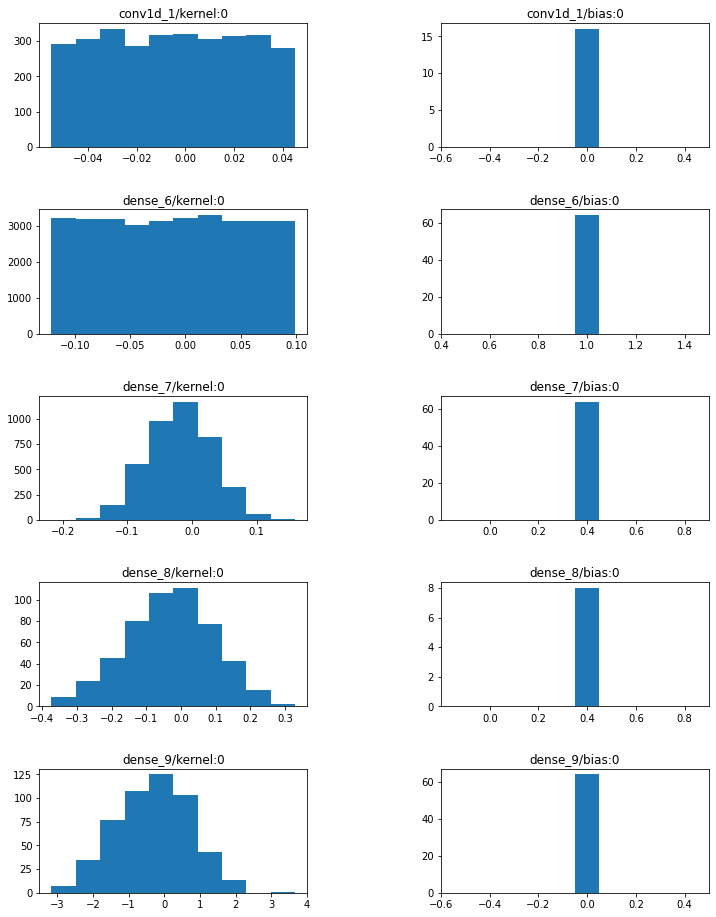

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(12,16))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Filter out the pooling and flatten layers, that don't have any weights
weight_layers = [layer for layer in model.layers if len(layer.weights) > 0]
print('enumerate(weight_layers): ', enumerate(weight_layers))

for i, layer in enumerate(weight_layers): # enumerate assigns a value (i) to each element (layer)
    for j in [0, 1]:
        axes[i, j].hist(layer.weights[j].numpy().flatten(), align='left')
        axes[i, j].set_title(layer.weights[j].name)

## Further reading and resources 
* https://keras.io/initializers/
* https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/initializers